In [11]:
import tabula
import PyPDF2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import date
import wget
import os
import numpy as np

In [12]:
#declare the path of your file
file_path = "./2020-03-16.pdf"
#Convert your file
df_age = tabula.read_pdf(file_path,pages=2)[1]
df_country = tabula.read_pdf(file_path,pages=3)[0]
df_fylke = tabula.read_pdf(file_path,pages=4)[1]

Got stderr: Mar 17, 2020 8:27:59 AM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored



In [13]:
df_fylke.columns

Index(['Fylke', 'Antall positive'], dtype='object')

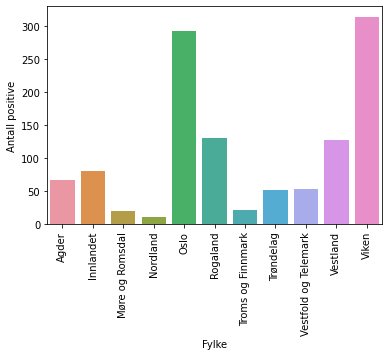

In [14]:
ax=sns.barplot(x=df_fylke.columns[0],y=df_fylke.columns[1],data=df_fylke)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

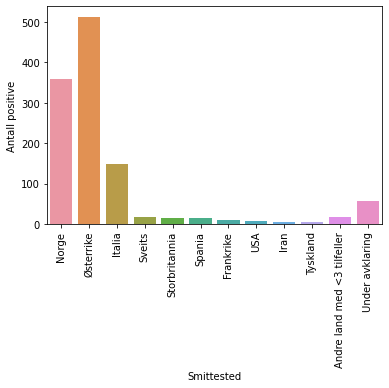

In [15]:
ax=sns.barplot(x=df_country.columns[0],y=df_country.columns[1],data=df_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

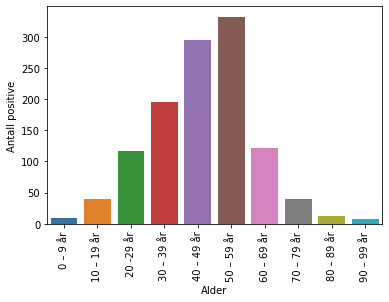

In [16]:
ax=sns.barplot(x=df_age.columns[0],y=df_age.columns[1],data=df_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [17]:
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.pdf')]
print(files)

['2020-03-09.pdf', '2020-03-11.pdf', '2020-03-12.pdf', '2020-03-14.pdf', '2020-03-15.pdf', '2020-03-16.pdf']


In [18]:
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.pdf')]
df = pd.DataFrame (columns = ['Totalt_Tilfeller','Nye_tilfeller','Pasienter','Dødsfall','Totalt_testet'])

for f in files[1:]:
    print(f)
    pdfFileObj = open(f, 'rb')
    # pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageone = pdfReader.getPage(0).extractText()
    pageone = re.sub(r'(\d)\s+(\d)', r'\1\2', pageone).split(" i Norge (utbruddsregisteret).",1)[1]
    words=[s for s in pageone.split()]
    line=' '.join(words)
    try:
        ttilfeller=re.findall(r"(\d+) tilfeller", line)[0]
    except:
        ttilfeller=np.nan
    try:
        ntilfeller=re.findall(r"(\d+) tilfeller", line)[1]
    except:
        ntilfeller=np.nan
    try:
        pasienter=re.findall(r"(\d+) pasienter", line)[0]
    except:
        pasienter=np.nan
    try:
        dødsfall=re.findall(r"(\d+) dødsfall", line)[0]
    except:
        dødsfall=np.nan
    try:
        testet=re.findall(r"Totalt (\d+)", line)[0]
    except:
        testet=np.nan
    data = {'Totalt_Tilfeller':  [ttilfeller],
        'Nye_tilfeller': [ntilfeller],
        'Pasienter': [pasienter],
        'Dødsfall': [dødsfall],
        'Totalt_testet': [testet],
        }
    df = df.append(pd.DataFrame (data, columns = ['Totalt_Tilfeller','Nye_tilfeller','Pasienter','Dødsfall','Totalt_testet']))
datetime_index = pd.DatetimeIndex([re.sub(r'.pdf', '', f) for f in files[1:]])
df=df.set_index(datetime_index)

2020-03-11.pdf
2020-03-12.pdf
2020-03-14.pdf
2020-03-15.pdf
2020-03-16.pdf


In [21]:
df

,Totalt_Tilfeller,Nye_tilfeller,Pasienter,Dødsfall,Totalt_testet
2020-03-11,459,NaN,NaN,NaN,NaN
2020-03-12,621,163,NaN,NaN,NaN
2020-03-14,907,156,NaN,NaN,NaN
2020-03-15,1077,166,NaN,NaN,NaN
2020-03-16,1169,96,11,3,18062


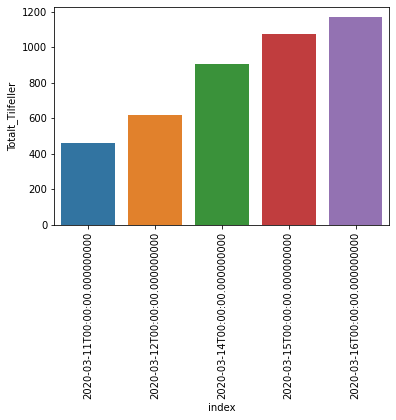

In [20]:
ax=sns.barplot(data = df.reset_index(), x = 'index', y = 'Totalt_Tilfeller')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()